# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Ivan Rahadian]
- **Email:** [ivanrahadian09@gmail.com]
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan musim? (Apakah ada musim tertentu yang memiliki tingkat peminjaman lebih tinggi?)
- Bagaimana hubungan faktor cuaca (suhu, kelembaban, kecepatan angin) dengan jumlah peminjaman sepeda? (Apakah suhu tinggi meningkatkan atau mengurangi peminjaman sepeda)
- Bagaimana tren peminjaman sepeda sepanjang hari? (Apakah ada pola tertentu dalam jumlah peminjaman berdasarkan waktu?)
- Apakah hari kerja dan akhir pekan memiliki pola peminjaman yang berbeda? (Apakah lebih banyak orang menggunakan sepeda pada hari kerja atau akhir pekan?)

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import Library
import pandas as pd      # Untuk manipulasi data
import numpy as np       # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi dasar
import seaborn as sns    # Untuk visualisasi yang lebih menarik
import matplotlib.ticker as ticker  # Untuk mengatur format label sumbu y

## Data Wrangling

### Gathering Data

In [ ]:
# Mengumpulkan data
df_day = pd.read_csv("/content/day.csv")
df_hour = pd.read_csv("/content/hour.csv")

**Insight:**
- Data yang dipakai menggunakan dataset day dan hour

### Assessing Data

In [ ]:
# Melakukan assess dataset day
df_day.info()         # Menampilkan informasi tentang tipe data di setiap kolom
df_day.isnull().sum() # Mengecek jumlah nilai yang hilang di setiap kolom
df_day.head()         # Melihat 5 baris pertama dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Melakukan assess dataset hour
df_hour.info()         # Menampilkan informasi tentang tipe data di setiap kolom
df_hour.isnull().sum() # Mengecek jumlah nilai yang hilang di setiap kolom
df_hour.head()         # Melihat 5 baris pertama dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Melakukan pengecekan duplikat data dataset day dan hour
print("Duplikasi =", df_day.duplicated().sum())
print("Duplikasi =", df_hour.duplicated().sum())

Duplikasi = 0
Duplikasi = 0


Tidak terdapat data duplikasi pada kedua dataset

In [ ]:
# Melakukan pengecekan missing data dataset day
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Melakukan pengecekan missing data dataset hour
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Melakukan pemeriksaan parameter statistik day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Melakukan pemeriksaan parameter statistik hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset day terdiri 731 baris dan 16 kolom sedangan dataset hour 17379 baris dan 17 kolom
- Tidak terdapat missing dan duplikasi data

### Cleaning Data

In [ ]:
# Ubah format kolom 'dteday' menjadi tipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [ ]:
# Ubah tipe data menjadi category
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns:
    df_day[column] = df_day[column].astype('category')
    df_hour[column] = df_hour[column].astype('category')

In [ ]:
# Mengganti nama kolom menjadi lebih mudah dibaca dataset day
df_day.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday' : 'day_of_week',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

In [ ]:
# Mengganti nama kolom menjadi lebih mudah dibaca dataset hour
df_hour.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday' : 'day_of_week',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

In [ ]:
# Melakukan penyesuaian isi kolom agar mudah dibaca

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].replace(season_mapping)
df_hour['season'] = df_hour['season'].replace(season_mapping)

# Konversi month menjadi kategori
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_day['month'] = df_day['month'].replace(month_mapping)
df_hour['month'] = df_hour['month'].replace(month_mapping)

# Konversi weather_condition menjadi kategori
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
df_day['weather_condition'] = df_day['weather_condition'].replace(weather_mapping)
df_hour['weather_condition'] = df_hour['weather_condition'].replace(weather_mapping)

# Konversi day_of_week menjadi kategori
day_of_week_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df_day['day_of_week'] = df_day['day_of_week'].replace(day_of_week_mapping)
df_hour['day_of_week'] = df_hour['day_of_week'].replace(day_of_week_mapping)

# Konversi year menjadi kategori
year_mapping = {0: 2011, 1: 2012}
df_day['year'] = df_day['year'].replace(year_mapping)
df_hour['year'] = df_hour['year'].replace(year_mapping)

# Menghitung Humidity
df_day['humidity'] = df_day['humidity']*100
df_hour['humidity'] = df_hour['humidity']*100

In [ ]:
# Membuat kolom weekday and weekend
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(day_of_week):
    if day_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

df_day["category_days"] = df_day["day_of_week"].apply(get_category_days)

df_hour["category_days"] = df_hour["day_of_week"].apply(get_category_days)

In [ ]:
# Membuat kolom kategori humidity
def classify_of_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

df_day["category_humidity"] = df_day["humidity"].apply(classify_of_humidity)

df_hour["category_humidity"] = df_hour["humidity"].apply(classify_of_humidity)

**Insight:**
- Mengubah format tanggal agar dapat digunakan dalam analisa waktu
- Mengubah nilai musim, hari kerja, bulan, dan tahun agar lebih mudah dibaca
- Mengubah nama kolom agar mudah dibaca
- Penambahan nama weekday/weekend dan humidity

## Exploratory Data Analysis (EDA)

### Explore Data Set

In [ ]:
# Melihat Ringkasan Statistik Data
df_day.describe(include="all")


,instant,dteday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,category_days,category_humidity
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012.0,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [71]:
# melihat jumlah peminjaman tiap musim
df_season = df_day.groupby("season", observed=False)["count"].sum().sort_values(ascending=False).reset_index()
df_season.columns = ["Musim", "Total Pengguna"]
df_season.head(10)

,Musim,Total Pengguna
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [77]:
# Menghitung jumlah peminjaman casual vs registered
df_day_pivot = df_day.groupby("year")[["registered", "casual"]].sum().reset_index()
print(df_day_pivot)

   year  registered  casual
0  2011      995851  247252
1  2012     1676811  372765


<ipython-input-77-a4ecb83f73a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day_pivot = df_day.groupby("year")[["registered", "casual"]].sum().reset_index()


In [ ]:
# Melihat Ringkasan Statistik Data
df_hour.describe(include="all")

,instant,dteday,season,year,month,hr,holiday,day_of_week,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,category_days,category_humidity
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012.0,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [ ]:
# Menampilkan jumlah peminjaman sepeda per jam

df_hour.groupby(by="hr").agg({
    "count": ["sum"]
})

,count
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


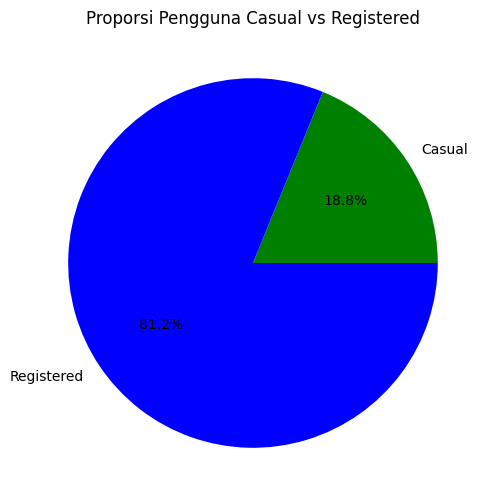

In [ ]:
# Perbandingan Pengguna Casual vs Registered
plt.figure(figsize=(6, 6))
df_day[["casual", "registered"]].sum().plot(kind="pie", autopct='%1.1f%%', colors=["green", "blue"], labels=["Casual", "Registered"])
plt.ylabel("")  # Menghilangkan label y agar lebih rapi
plt.title("Proporsi Pengguna Casual vs Registered")
plt.show()

**Insight:**
- Peminjaman sering dilakukan pada cuaca cerah di musim fall dengan  dan pengguna terregistrasi.
- Perilaku peminjaman sering kali dilakukan pada 7 pagi sampai 9 malam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan musim? (Apakah ada musim tertentu yang memiliki tingkat peminjaman lebih tinggi?)

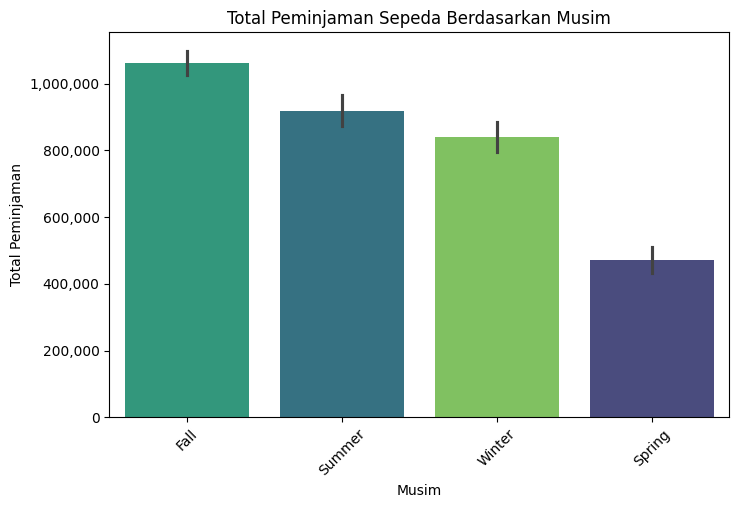

In [ ]:
# Mengelompokkan data berdasarkan musim dan mengurutkan berdasarkan total peminjaman
season_order = df_day.groupby("season", observed=False)["count"].sum().sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.barplot(
    x="season",
    y="count",
    data=df_day,
    estimator=sum,
    order=season_order,  # Mengurutkan berdasarkan total peminjaman
    hue="season",  # Menambahkan hue agar palette bisa diterapkan tanpa warning
    palette="viridis",
    legend=False
)

plt.xlabel("Musim")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda Berdasarkan Musim")
plt.xticks(rotation=45)

# Mengubah format angka di sumbu Y agar lebih mudah dibaca
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

### Pertanyaan 2: Bagaimana hubungan faktor cuaca (suhu, kelembaban, kecepatan angin) dengan jumlah peminjaman sepeda? (Apakah suhu tinggi meningkatkan atau mengurangi peminjaman sepeda)

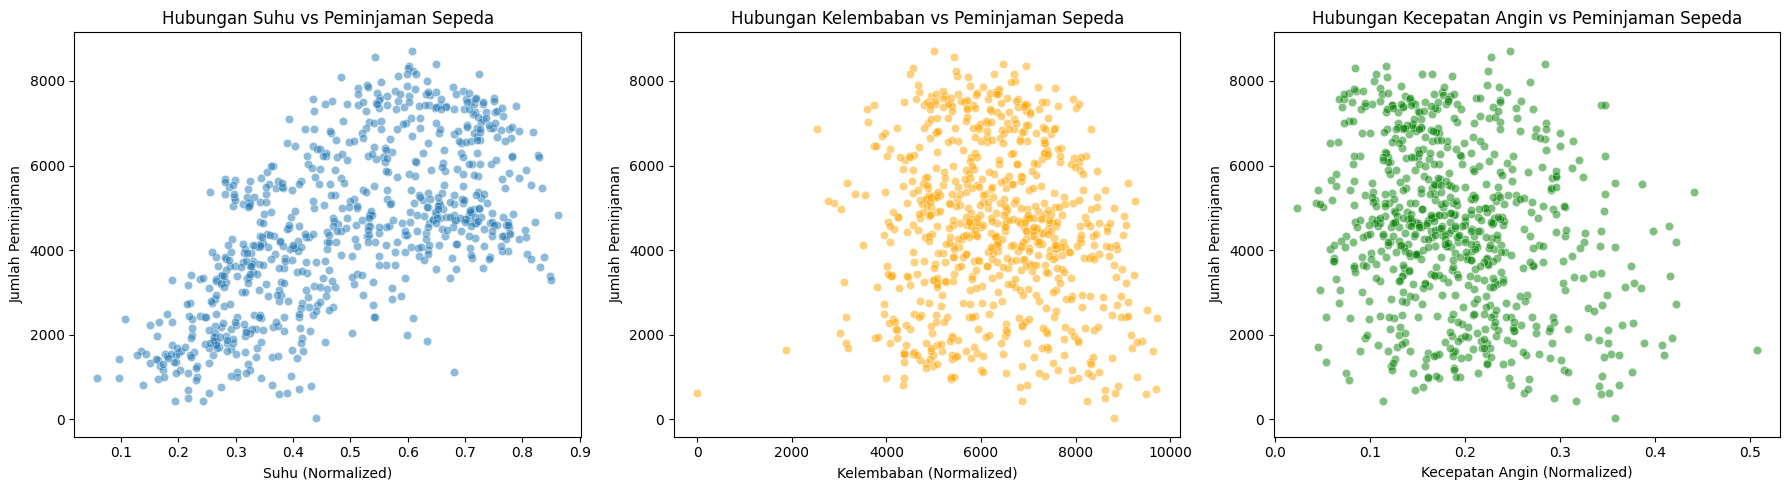

In [ ]:
# Visualisasi hubungan antara faktor cuaca dan jumlah peminjaman sepeda
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Suhu vs Peminjaman
sns.scatterplot(x="temp", y="count", data=df_day, ax=axes[0], alpha=0.5)
axes[0].set_title("Hubungan Suhu vs Peminjaman Sepeda")
axes[0].set_xlabel("Suhu (Normalized)")
axes[0].set_ylabel("Jumlah Peminjaman")

# Kelembaban vs Peminjaman
sns.scatterplot(x="humidity", y="count", data=df_day, ax=axes[1], alpha=0.5, color="orange")
axes[1].set_title("Hubungan Kelembaban vs Peminjaman Sepeda")
axes[1].set_xlabel("Kelembaban (Normalized)")
axes[1].set_ylabel("Jumlah Peminjaman")

# Kecepatan Angin vs Peminjaman
sns.scatterplot(x="windspeed", y="count", data=df_day, ax=axes[2], alpha=0.5, color="green")
axes[2].set_title("Hubungan Kecepatan Angin vs Peminjaman Sepeda")
axes[2].set_xlabel("Kecepatan Angin (Normalized)")
axes[2].set_ylabel("Jumlah Peminjaman")

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana tren peminjaman sepeda sepanjang hari? (Apakah ada pola tertentu dalam jumlah peminjaman berdasarkan waktu?)


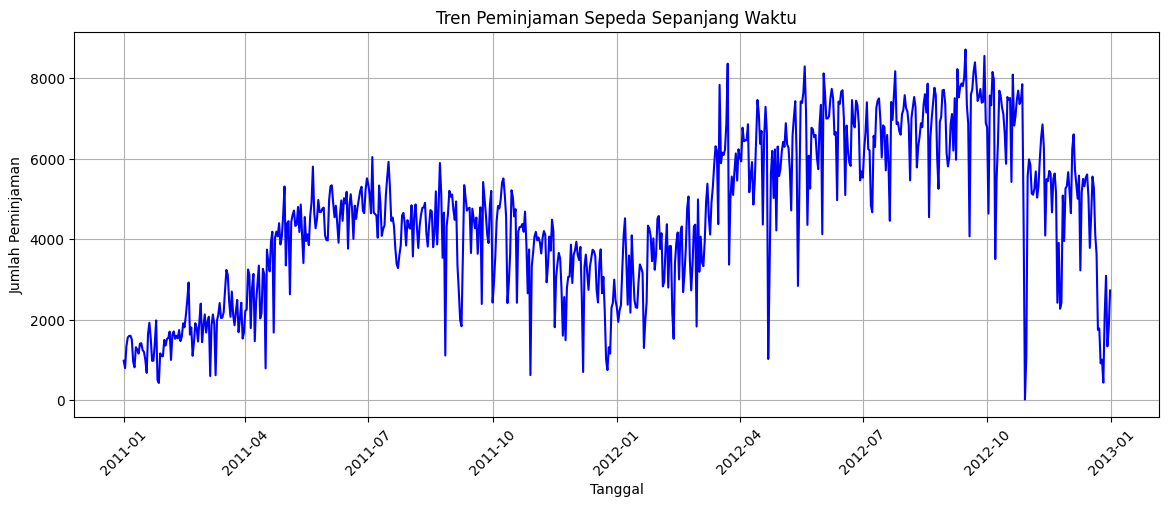

In [ ]:
# Ubah tanggal ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

# Hitung tren peminjaman sepeda harian
plt.figure(figsize=(14, 5))
sns.lineplot(x="dteday", y="count", data=df_day, color="blue")
plt.title("Tren Peminjaman Sepeda Sepanjang Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 4: Apakah hari kerja dan akhir pekan memiliki pola peminjaman yang berbeda? (Apakah lebih banyak orang menggunakan sepeda pada hari kerja atau akhir pekan?)

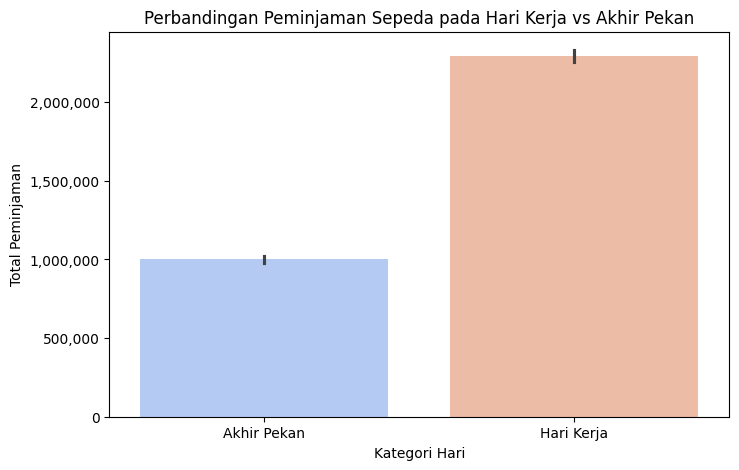

In [ ]:
# Buat kolom baru untuk label hari kerja vs akhir pekan
df_hour["workingday_label"] = df_hour["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Plot perbandingan jumlah peminjaman sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday_label", y="count", data=df_hour, estimator=sum, hue="workingday_label", palette="coolwarm", legend=False)

# Tambahkan format untuk sumbu Y (angka tanpa desimal dan dengan pemisah ribuan)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menambahkan judul dan label sumbu
plt.title("Perbandingan Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Peminjaman")

# Menampilkan plot
plt.show()

**Insight:**
- Musim fall memiliki jumlah peminjaman tertinggi, hal ini mungkin karena cuaca yang relatif stabil dan nyaman untuk bersepeda. Kebalikannya, musim semi memiliki jumlah peminjaman terendah.
- Terdapat hubungan positif antara suhu dan jumlah pinjaman sepeda, kelembaban memiliki hubungan negatif dengan jumlah pinjaman sepeda dan tidak ada hubungan yang kuat antara kecepatan angin dengan pinjaman sepeda.
- Tren peminjaman sepeda mengalami kenaikan seiring waktu, menunjukkan popularitas layanan ini. Fluktuasi musiman dengan penurunan di bulan-bulan tertentu.
- Peminjaman lebih tinggi terjadi di hari kerja dibandingkan di akhir pekan. Hal ini menunjukkan sepeda digunakan untuk kegiatan sehari-hari, seperti sekolah ataupun bekerja.

## Analisis Lanjutan (Opsional)

Analisa RFM

Analisa RFM dapat digunakan untuk memahami perilaku pengguna (konsumen), dengan faktor berikut
- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

In [ ]:
# Menentukan tanggal terbaru dalam dataset
latest_date = df_hour['dteday'].max()

# Menghitung Recency, Frequency, Monetary
rfm_df = df_hour.groupby('registered').agg(
    Recency=('dteday', lambda x: (latest_date - x.max()).days),  # Jarak hari terakhir transaksi
    Frequency=('instant', 'nunique'),  # Jumlah hari pelanggan melakukan transaksi
    Monetary=('count', 'sum')  # Total peminjaman sepeda
).reset_index()

# Menampilkan hasil
print("Pengguna berdasarkan RFM")
print(rfm_df.head())

Pengguna berdasarkan RFM
   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


Analisa Clustering sederhana

Analisa  untuk mendapatkan clusstering peminjaman berdasarkan situasi cuaca dan kelembaban:

In [ ]:
# Clustering Berdasarkan Weather Condition dan mengurutkan hasilnya DESCENDING
weather_usage = df_hour.groupby("weather_condition", observed=False)["count"].count().reset_index()

# Urutkan berdasarkan jumlah pengguna (count) secara descending (dari yang terbesar ke terkecil)
weather_usage_sorted = weather_usage.sort_values(by="count", ascending=False)

# Tampilkan hasil
print("Total Pengguna Berdasarkan Weather Condition")
print(weather_usage_sorted)


Total Pengguna Berdasarkan Weather Condition
  weather_condition  count
0             Clear  11413
1             Misty   4544
2    Light_rainsnow   1419
3    Heavy_rainsnow      3


In [ ]:
# Clustering Berdasarkan Humidity dan mengurutkan hasilnya DESCENDING
humidity_counts = df_hour.groupby("category_humidity", observed=False)["count"].count().reset_index()

# Urutkan berdasarkan jumlah pengguna (count) secara descending (dari yang terbesar ke terkecil)
humidity_counts_sorted = humidity_counts.sort_values(by="count", ascending=False)

# Tampilkan hasil
print("Total Pengguna Berdasarkan Humidity:")
print(humidity_counts_sorted)


Total Pengguna Berdasarkan Humidity:
  category_humidity  count
1    Terlalu Lembab   8356
0             Ideal   5505
2    Terlalu kering   3518


## Conclusion

- Peminjaman sepeda sering dilakukan pada musim fall yang memiliki suhu lebih nyaman dibandingkan dengan musim lainnya
- Peminjaman sepeda memiliki hubungan dengan suhu, saat suhu meningkat akan meningkatkan jumlah peminjaman, namun akan menurun pada suhu tinggi (musim panas), peminjaman dilakukan pada udara terlalu lembab, dan tidak ada pengaruh kecepatan angin terhadap peminjaman.
- Tren peminjaman mengalami peningkatan sepanjang tahun, namun terdapat fluktuasi di beberapa bulan.
- Peminjmanan seringnya terjadi di hari kerja dibandingkan dengan dengan akhir pekan. Hal ini menunjakkan bahwa sepeda digunakan untuk melakukan aktivitas ke kantor, sekolah ataupun kegiatan lainnya.
- Analisa RFM menunjukan peminjaman sepeda besaran pada kategory monetery.
- Clustering peminjam sepeda berdasarkan kondisi cuaca dan kelembaban, menunjukan bahwa peminjam sepeda sebagian besar pada cuaca cerah dnegan kelembaban yang tinggi.